In [1]:
from graphviz import Digraph

In [2]:
dot = Digraph(node_attr={'shape': 'box'})

dot.node('A', label='Клиент старше 18 лет?')
dot.node('B', label='Превышает ли его заработок 50 тысяч рублей?')
dot.node('C', label='Отказать')
dot.node('D', label='Были ли у клиента просроченные кредиты ранее?')
dot.node('E', label='Отказать')
dot.node('F', label='Отказать')
dot.node('G', label='Выдать')

dot.edge('A', 'B', label='да')
dot.edge('A', 'C', label='нет')
dot.edge('B', 'D', label='да')
dot.edge('B', 'E', label='нет')
dot.edge('D', 'F', label='да')
dot.edge('D', 'G', label='нет')

dot

In [3]:
import matplotlib.pyplot as plt
import random

from matplotlib.colors import ListedColormap
from sklearn import datasets

import numpy as np

In [4]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]], dtype = np.float64)
y = np.array([0, 0, 1, 0, 1, (0), 1, 0, 1, 1], dtype = np.float64)

h = 1/n * np.sum(p(1.0 - p))

In [5]:
x = X[2, :].copy()
x

array([ 500.,  700.,  750.,  600., 1450.,  800., 1500., 2000.,  450.,
       1000.])

In [6]:
x[x >= 1000]

array([1450., 1500., 2000., 1000.])

In [7]:
y[x >= 1000]

array([1., 1., 0., 1.])

In [8]:
condition = x >= 1000

In [9]:
condition

array([False, False, False, False,  True, False,  True,  True, False,
        True])

In [10]:
y[condition]

array([1., 1., 0., 1.])

In [11]:
x[x < 1000]

array([500., 700., 750., 600., 800., 450.])

In [12]:
y[x < 1000]

array([0., 0., 1., 0., 0., 1.])

In [13]:
x_right_0 = (y[x >= 1000] == 0).sum()
x_right_0

1

In [14]:
x_right_1 = (y[x >= 1000] == 1).sum()
x_right_1

3

In [15]:
len(y[x >= 1000])

4

In [16]:
y[x >= 1000] == 1

array([ True,  True, False,  True])

In [17]:
def calc_gini(x, y, t):
  qty_all = len(y)
  qty_left = len(y[x < t])
  qty_right = qty_all - qty_left

  # Индекс Джини не будет равен бесконечности в таком случае,
  # но и считать его особо смысла нет, т.к. получается только одна ветвь
  if qty_left == 0 or qty_right == 0:
    return np.inf

  qty0_left = ((y[x < t]) == 0).sum()
  qty0_right = ((y[x >= t]) == 0).sum()
  
  p0_left = qty0_left / qty_left
  p1_left = 1 - p0_left

  p0_right = qty0_right / qty_right
  p1_right = 1 - p0_right
  
  # Нормировочный коэффициент для левого листа
  left_coef = qty_left / qty_all

  # Индекс Джини для левого листа
  h_left = p0_left * (1 - p0_left) + p1_left * (1 - p1_left)
  # Индекс Джини для правого листа
  h_right = p0_right * (1 - p0_right) + p1_right * (1 - p1_right)

  res = left_coef * h_left + (1 - left_coef) * h_right
  return res


In [18]:
# Расчет критерия Джини

def gini(labels):
    #  подсчет количества объектов разных классов
    classes = {}
    for label in labels:
        if label not in classes:
            classes[label] = 0
        classes[label] += 1
    
    #  расчет критерия
    impurity = 1
    for label in classes:
        p = classes[label] / len(labels)
        impurity -= p ** 2
        
    return impurity

In [19]:
# i, c = gini(y[x < 450])

In [20]:
gini(y[x < 450])

1

In [21]:
# Расчет качества

def quality(left_labels, right_labels):

    # доля выбоки, ушедшая в левое поддерево
    p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
    
    return p * gini(left_labels) + (1 - p) * gini(right_labels)

In [22]:
for t in x:
  print('Порог: {}, gini = {} ({})'.format(t, calc_gini(x, y, t), quality(y[x < t], y[x >= t])))

Порог: 500.0, gini = 0.4444444444444444 (0.4444444444444444)
Порог: 700.0, gini = 0.47619047619047616 (0.47619047619047616)
Порог: 750.0, gini = 0.4166666666666667 (0.4166666666666667)
Порог: 600.0, gini = 0.5 (0.5)
Порог: 1450.0, gini = 0.47619047619047616 (0.4761904761904763)
Порог: 800.0, gini = 0.48 (0.48)
Порог: 1500.0, gini = 0.5 (0.5)
Порог: 2000.0, gini = 0.4444444444444444 (0.4444444444444444)
Порог: 450.0, gini = inf (0.5)
Порог: 1000.0, gini = 0.4166666666666667 (0.4166666666666667)


Построение дерева решений

In [23]:
# сгенерируем данные
classification_data, classification_labels = datasets.make_classification(n_features = 2, n_informative = 2, 
                                                      n_classes = 2, n_redundant=0, 
                                                      n_clusters_per_class=1, random_state=5)

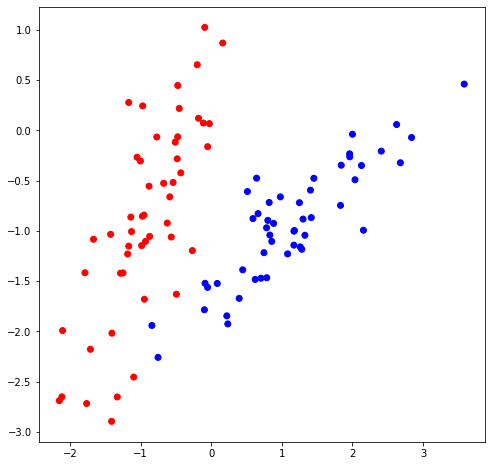

In [24]:
# визуализируем сгенерированные данные

colors = ListedColormap(['red', 'blue'])
light_colors = ListedColormap(['lightcoral', 'lightblue'])

plt.figure(figsize=(8,8))
plt.scatter(list(map(lambda x: x[0], classification_data)), list(map(lambda x: x[1], classification_data)), 
              c=classification_labels, cmap=colors)

In [25]:
# Реализуем класс узла

class Node:
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле

In [26]:
# И класс терминального узла (листа)

class Leaf:
    
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.prediction = self.predict()
        
    def predict(self):
        # подсчет количества объектов разных классов
        classes = {}  # сформируем словарь "класс: количество объектов"
        for label in self.labels:
            if label not in classes:
                classes[label] = 0
            classes[label] += 1
        #  найдем класс, количество объектов которого будет максимальным в этом листе и вернем его    
        prediction = max(classes, key=classes.get)
        return prediction        

In [27]:
# Расчет критерия Джини

def gini(labels):
    #  подсчет количества объектов разных классов
    classes = {}
    for label in labels:
        if label not in classes:
            classes[label] = 0
        classes[label] += 1
    
    #  расчет критерия
    impurity = 1
    for label in classes:
        p = classes[label] / len(labels)
        impurity -= p ** 2
        
    return impurity

In [28]:
# Расчет качества

def quality(left_labels, right_labels, current_gini):

    # доля выбоки, ушедшая в левое поддерево
    p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
    
    return current_gini - p * gini(left_labels) - (1 - p) * gini(right_labels)

In [29]:
# Разбиение датасета в узле

def split(data, labels, index, t):
    
    left = np.where(data[:, index] <= t)
    right = np.where(data[:, index] > t)
        
    true_data = data[left]
    false_data = data[right]
    true_labels = labels[left]
    false_labels = labels[right]
        
    return true_data, false_data, true_labels, false_labels

In [30]:
# Нахождение наилучшего разбиения

def find_best_split(data, labels):
    
    #  обозначим минимальное количество объектов в узле
    min_leaf = 5

    current_gini = gini(labels)

    best_quality = 0
    best_t = None
    best_index = None
    
    n_features = data.shape[1]
    
    for index in range(n_features):
        t_values = [row[index] for row in data]
        
        for t in t_values:
            true_data, false_data, true_labels, false_labels = split(data, labels, index, t)
            #  пропускаем разбиения, в которых в узле остается менее 5 объектов
            if len(true_data) < min_leaf or len(false_data) < min_leaf:
                continue
            
            current_quality = quality(true_labels, false_labels, current_gini)
            
            #  выбираем порог, на котором получается максимальный прирост качества
            if current_quality > best_quality:
                best_quality, best_t, best_index = current_quality, t, index

    return best_quality, best_t, best_index

In [31]:
# Построение дерева с помощью рекурсивной функции

def build_tree(data, labels):

    quality, t, index = find_best_split(data, labels)

    #  Базовый случай - прекращаем рекурсию, когда нет прироста в качества
    if quality == 0:
        return Leaf(data, labels)

    true_data, false_data, true_labels, false_labels = split(data, labels, index, t)

    # Рекурсивно строим два поддерева
    true_branch = build_tree(true_data, true_labels)
    false_branch = build_tree(false_data, false_labels)

    # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
    return Node(index, t, true_branch, false_branch)

In [32]:
def classify_object(obj, node):

    #  Останавливаем рекурсию, если достигли листа
    if isinstance(node, Leaf):
        answer = node.prediction
        return answer

    if obj[node.index] <= node.t:
        return classify_object(obj, node.true_branch)
    else:
        return classify_object(obj, node.false_branch)

In [33]:
def predict(data, tree):
    
    classes = []
    for obj in data:
        prediction = classify_object(obj, tree)
        classes.append(prediction)
    return classes

In [34]:
# Разобьем выборку на обучающую и тестовую

from sklearn import model_selection

train_data, test_data, train_labels, test_labels = model_selection.train_test_split(classification_data, 
                                                                                     classification_labels, 
                                                                                     test_size = 0.3,
                                                                                     random_state = 1)

In [35]:
# Построим дерево по обучающей выборке
my_tree = build_tree(train_data, train_labels)

In [36]:
# Напечатаем ход нашего дерева
def print_tree(node, spacing=""):

    # Если лист, то выводим его прогноз
    if isinstance(node, Leaf):
        print(spacing + "Прогноз:", node.prediction)
        return

    # Выведем значение индекса и порога на этом узле
    print(spacing + 'Индекс', str(node.index))
    print(spacing + 'Порог', str(node.t))

    # Рекурсионный вызов функции на положительном поддереве
    print (spacing + '--> True:')
    print_tree(node.true_branch, spacing + "  ")

    # Рекурсионный вызов функции на положительном поддереве
    print (spacing + '--> False:')
    print_tree(node.false_branch, spacing + "  ")
    
print_tree(my_tree)

Индекс 0
Порог 0.16261402870113306
--> True:
  Индекс 1
  Порог -1.5208896621663803
  --> True:
    Индекс 0
    Порог -0.9478301462477035
    --> True:
      Прогноз: 0
    --> False:
      Прогноз: 1
  --> False:
    Прогноз: 0
--> False:
  Прогноз: 1


In [37]:
# Получим ответы для обучающей выборки 
train_answers = predict(train_data, my_tree)

In [38]:
# И получим ответы для тестовой выборки
answers = predict(test_data, my_tree)

In [39]:
# Введем функцию подсчета точности как доли правильных ответов
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

In [40]:
# Точность на обучающей выборке
train_accuracy = accuracy_metric(train_labels, train_answers)
train_accuracy

98.57142857142858

In [41]:
# Точность на тестовой выборке
test_accuracy = accuracy_metric(test_labels, answers)
test_accuracy

100.0

Text(0.5, 1.0, 'Test accuracy=100.00')

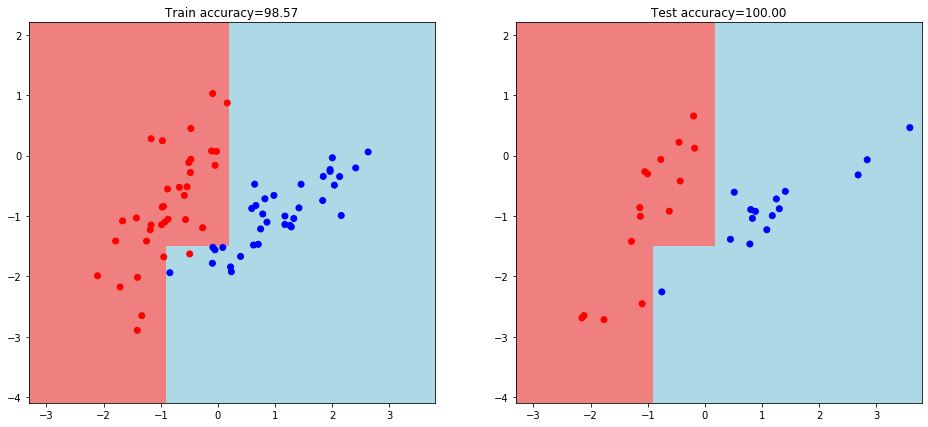

In [42]:
# Визуализируем дерево на графике

def get_meshgrid(data, step=.05, border=1.2):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

plt.figure(figsize = (16, 7))

# график обучающей выборки
plt.subplot(1,2,1)
xx, yy = get_meshgrid(train_data)
mesh_predictions = np.array(predict(np.c_[xx.ravel(), yy.ravel()], my_tree)).reshape(xx.shape)
plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
plt.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, cmap = colors)
plt.title(f'Train accuracy={train_accuracy:.2f}')

# график тестовой выборки
plt.subplot(1,2,2)
plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
plt.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, cmap = colors)
plt.title(f'Test accuracy={test_accuracy:.2f}')

## Домашнее задание

1. В коде из методички реализуйте один или несколько из критериев останова (количество листьев, количество используемых признаков, глубина дерева и т.д.)  

In [43]:
# Построение дерева с помощью рекурсивной функции
# Добавил счетчик на максимальную глубину и максимальное количество использованных признаков

def build_tree(data, labels, max_features=np.inf, max_depth=np.inf, 
               curr_features=[], curr_depth=0):
    #  Базовый случай - прекращаем рекурсию, когда нет прироста в качества, 
    #  либо достигнута максимальная глубина дерева, либо использовано больше признаков, чем требовалось
    if curr_depth == max_depth:
        return Leaf(data, labels)
    
    quality, t, index = find_best_split(data, labels)
    
    if index not in curr_features:
        curr_features.append(index)

    if quality == 0:
        return Leaf(data, labels)
    
    if len(curr_features) > max_features:
        return Leaf(data, labels)
    

    true_data, false_data, true_labels, false_labels = split(data, labels, index, t)

    # Рекурсивно строим два поддерева
    true_branch = build_tree(true_data, true_labels, 
                             max_features=max_features, max_depth=max_depth,
                             curr_features=curr_features, curr_depth=curr_depth + 1)
    
    false_branch = build_tree(false_data, false_labels, 
                              max_features=max_features, max_depth=max_depth,
                              curr_features=curr_features, curr_depth=curr_depth + 1)

    # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
    return Node(index, t, true_branch, false_branch)

In [44]:
# Построим дерево по обучающей выборке
my_tree = build_tree(train_data, train_labels, max_features=1)

In [45]:
print_tree(my_tree)

Индекс 0
Порог 0.16261402870113306
--> True:
  Прогноз: 0
--> False:
  Прогноз: 1


2*. Реализуйте дерево для задачи регрессии. Возьмите за основу дерево, реализованное в методичке, заменив механизм предсказания в листе на взятие среднего значения по выборке, и критерий Джини на дисперсию значений.

In [56]:
class Regression_Leaf:
    
    def __init__(self, data, targets):
        self.data = data
        self.targets = targets
        self.prediction = self.predict()
        
    def predict(self):
        # возвращаем среднее значение по листу   
        prediction = np.mean(self.targets)
        return prediction    

In [57]:
# Нахождение наилучшего разбиения
# Меняем критерий Джини на дисперсии

def find_best_split_reg(data, targets):
    
    #  обозначим минимальное количество объектов в узле
    min_leaf = 5

    current_var = np.var(targets)

    best_quality = 0
    best_t = None
    best_index = None
    
    n_features = data.shape[1]
    
    for index in range(n_features):
        t_values = [row[index] for row in data]
        
        for t in t_values:
            true_data, false_data, true_targets, false_targets = split(data, targets, index, t)
            #  пропускаем разбиения, в которых в узле остается менее 5 объектов
            if len(true_data) < min_leaf or len(false_data) < min_leaf:
                continue
            
            current_quality = quality_reg(true_targets, false_targets, current_var)
            
            #  выбираем порог, на котором получается максимальный прирост качества
            if current_quality > best_quality:
                best_quality, best_t, best_index = current_quality, t, index

    return best_quality, best_t, best_index

In [58]:
# Расчет качества
# Меняем критерий Джини на дисперсии

def quality_reg(left_labels, right_labels, current_var):

    # доля выбоки, ушедшая в левое поддерево
    p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
    
    return current_var - p * np.var(left_labels) - (1 - p) * np.var(right_labels)

In [59]:
def build_reg_tree(data, targets, max_features=np.inf, max_depth=np.inf, 
               curr_features=[], curr_depth=0):
    #  Базовый случай - прекращаем рекурсию, когда нет прироста в качества, 
    #  либо достигнута максимальная глубина дерева, либо использовано больше признаков, чем требовалось
    if curr_depth == max_depth:
        return Regression_Leaf(data, targets)
    
    quality, t, index = find_best_split_reg(data, targets)
    
    if index not in curr_features:
        curr_features.append(index)

    if quality == 0:
        return Regression_Leaf(data, targets)
    
    if len(curr_features) > max_features:
        return Regression_Leaf(data, targets)
    

    true_data, false_data, true_targets, false_targets = split(data, targets, index, t)

    # Рекурсивно строим два поддерева
    true_branch = build_reg_tree(true_data, true_targets, 
                             max_features=max_features, max_depth=max_depth,
                             curr_features=curr_features, curr_depth=curr_depth + 1)
    
    false_branch = build_reg_tree(false_data, false_targets, 
                              max_features=max_features, max_depth=max_depth,
                              curr_features=curr_features, curr_depth=curr_depth + 1)

    # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
    return Node(index, t, true_branch, false_branch)

In [60]:
def predict_object(obj, node):

    #  Останавливаем рекурсию, если достигли листа
    if isinstance(node, Regression_Leaf):
        answer = node.prediction
        return answer

    if obj[node.index] <= node.t:
        return predict_object(obj, node.true_branch)
    else:
        return predict_object(obj, node.false_branch)

In [79]:
def reg_predict(data, tree):
    
    targets = []
    for obj in data:
        prediction = predict_object(obj, tree)
        targets.append(prediction)
    return targets

In [80]:
# Напечатаем ход нашего дерева
def print_reg_tree(node, spacing=""):

    # Если лист, то выводим его прогноз
    if isinstance(node, Regression_Leaf):
        print(spacing + "Прогноз:", node.prediction)
        return

    # Выведем значение индекса и порога на этом узле
    print(spacing + 'Индекс', str(node.index))
    print(spacing + 'Порог', str(node.t))

    # Рекурсионный вызов функции на положительном поддереве
    print (spacing + '--> True:')
    print_reg_tree(node.true_branch, spacing + "  ")

    # Рекурсионный вызов функции на положительном поддереве
    print (spacing + '--> False:')
    print_reg_tree(node.false_branch, spacing + "  ")

In [129]:
reg_data, reg_targets = datasets.make_regression(n_features=10, n_informative=4, noise=1)

In [130]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(reg_data, 
                                                                                     reg_targets, 
                                                                                     test_size = 0.3,
                                                                                     random_state = 1)

In [143]:
my_reg_tree = build_reg_tree(train_data, train_labels, max_depth=4)

In [144]:
print_reg_tree(my_reg_tree)

Индекс 6
Порог 0.040060401813084734
--> True:
  Индекс 4
  Порог 0.6323633224166335
  --> True:
    Индекс 3
    Порог 0.2615663685948761
    --> True:
      Индекс 8
      Порог 0.15033001403658894
      --> True:
        Прогноз: -119.49504131126238
      --> False:
        Прогноз: -65.36763843358429
    --> False:
      Индекс 6
      Порог -0.7002910240672249
      --> True:
        Прогноз: -55.30700555602666
      --> False:
        Прогноз: 14.608242899082617
  --> False:
    Прогноз: 58.78198577429837
--> False:
  Индекс 6
  Порог 1.2604181548715052
  --> True:
    Индекс 3
    Порог 0.533134350918328
    --> True:
      Индекс 4
      Порог -0.34429989967171704
      --> True:
        Прогноз: -10.072074856681295
      --> False:
        Прогноз: 45.54955589471982
    --> False:
      Индекс 4
      Порог -0.18717351480188585
      --> True:
        Прогноз: 68.59613188477076
      --> False:
        Прогноз: 137.77777865445077
  --> False:
    Прогноз: 160.59191582408093


In [145]:
# Получим ответы для обучающей выборки 
train_answers = reg_predict(train_data, my_reg_tree)

# И получим ответы для тестовой выборки
answers = reg_predict(test_data, my_reg_tree)

In [146]:
from sklearn.metrics import r2_score

In [147]:
r2_score(train_labels, train_answers)

0.753859859841664

In [148]:
r2_score(test_labels, answers)

0.6839847342979009